In [1]:
# Import main packages 
from tilepy.include.ObservationScheduler import GetSchedule
from tilepy.include.PointingTools import ObservationParameters, NextWindowTools, getdate
import time
import argparse
import os
from pathlib import Path


/opt/miniconda3/envs/tilepyenv_1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

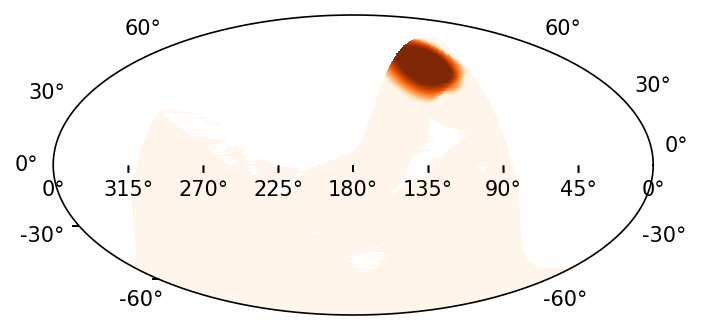

In [3]:
import mhealpy as mhp
from matplotlib.colors import LogNorm
from matplotlib import cm
import ligo.skymap.plot
import numpy as np

fname = '../742818129_0_n_PROBMAP.fits' # file_name or url    
mmap = mhp.HealpixMap.read_map(fname, field=1, density=True)

vmax = np.percentile(mmap.data, 99.0)
vmin = np.percentile(mmap.data[mmap.data>0], 10.0)
vmin = max(vmax/1e3, vmin)
    
im,ax = mmap.plot(norm=LogNorm(vmin=vmin, vmax=vmax), ax='astro degrees mollweide', cmap=cm.Oranges, rasterize=False, cbar=False)

In [29]:
alertType = 'gbm'
skymap = '../742818129_0_n_PROBMAP.fits' 
#skymap = 'https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2024/bn240612503/current/glg_healpix_all_bn240612503_v00.fit'


# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
#obsTime = getdate("2023-12-06  23:39:01")
#obsTime = getdate("2024-04-13  02:33:01")
obsTime = getdate("2023-06-10 14:51:47")

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../../tilepy/dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
cfgFile = '../config/FollowupParameters_CTAON.ini'

# Tiles already observed
pointingsFile = None

# Limit on skyloc to perform a followup
locCut = None

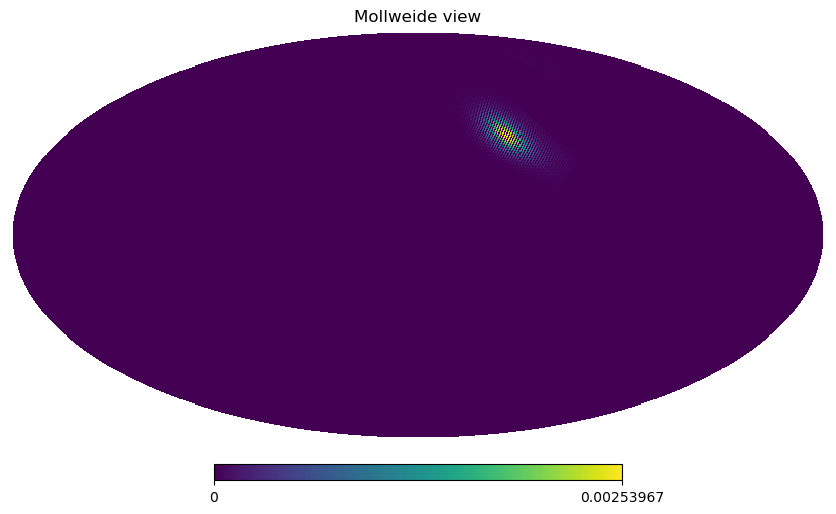

In [35]:
import ligo.skymap.io.fits as lf
import healpy as hp
import numpy as np
prob, meta = lf.read_sky_map(skymap, nest=True) 
npix = len(prob)
nside = hp.npix2nside(npix)
prob = hp.ud_grade(prob, nside, order_in ='NESTED',power=-2)
hp.mollview(prob, nest=True)



In [13]:
# Create forder for output
if not os.path.exists(outDir):
    os.makedirs(outDir)

In [14]:
#Parse the parameters 
obspar = ObservationParameters()
obspar.add_parsed_args(skymap,obsTime,datasetDir,None,outDir,pointingsFile,alertType,locCut)
obspar.from_configfile(cfgFile)

In [ ]:
skymap 

Reducing HRnside to the value from the original map: NSIDE= 128
Starting the 2D pointing calculation with the following parameters

Filename:  742818129_0_n_PROBMAP
Date:  2023-06-10 14:51:47
Previous pointings:  None
Dataset:  ../../tilepy/dataset/
Output:  ./output/742818129_0_n_PROBMAP

============== Main parsed observation parameters ==============  
Observatory Name: CTAO-N
Observatory: 28.75 deg
Observatory: -17.5 deg
Observatory: 2200.0 m
Max zenith: 70
Using Greytime is: False
FOV: 2.0
Max runs: 20
Duration: 15
High Resolution NSIDE: 128
Low Resolution NSIDE: 128
The strategy is (3D, integrated, mangrove=False)
The level of details is (doPlot=True, doRank = True)


-------------------   NEW EVENT   --------------------

Loading map from  ../742818129_0_n_PROBMAP.fits
Loading HEALPix map from file: ../742818129_0_n_PROBMAP.fits
----------   NEW FOLLOW-UP ATTEMPT   ----------

Total GW probability covered:  0.5701 Number of runs that fulfill darkness condition  : 16 Number of ef

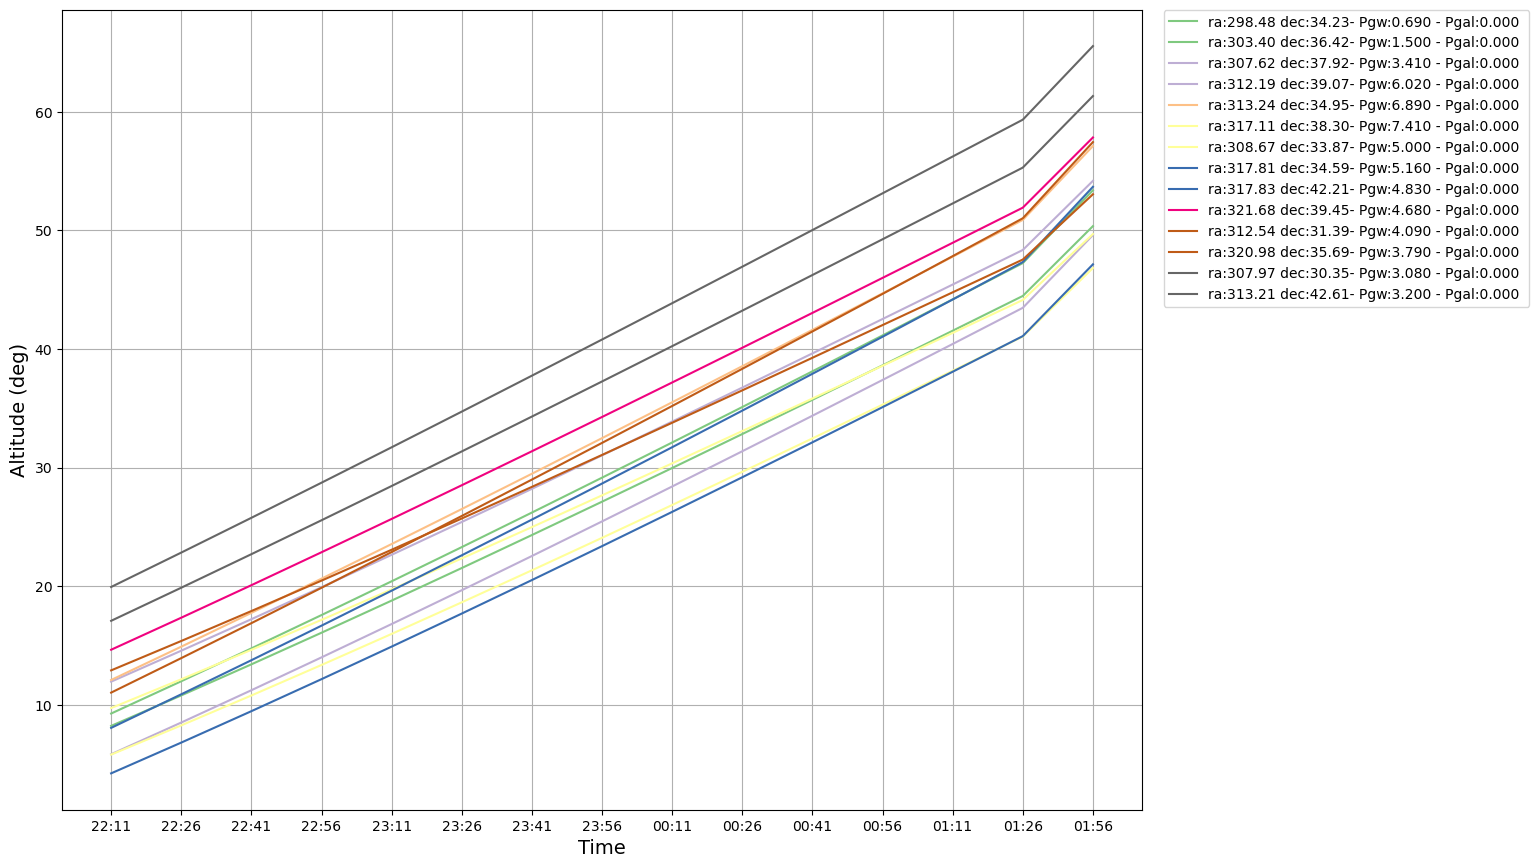

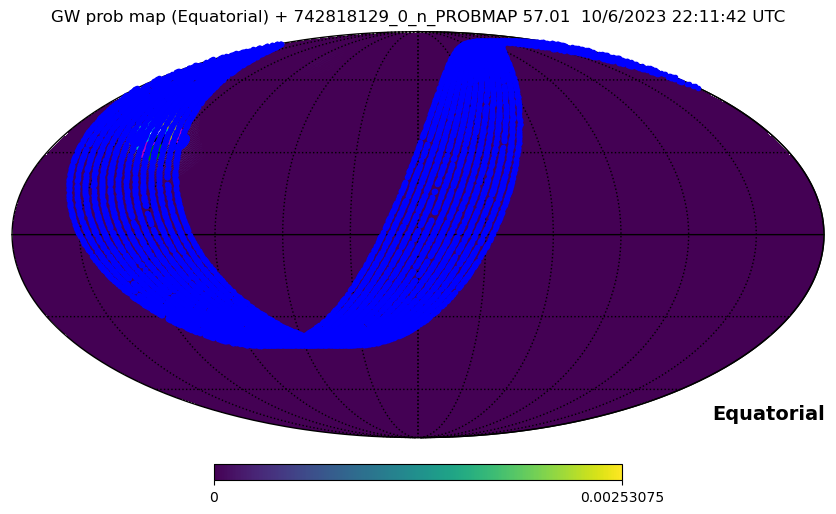

In [15]:
GetSchedule(obspar)